In [2]:
"""
This script works on TensorFlow 1.x :)
"""
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%pylab inline


print(tf.__version__)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

Populating the interactive namespace from numpy and matplotlib
1.12.0


In [3]:
def plot_points(x, y, title_name):
    plt.title(title_name)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.scatter(x, y)
    plt.show()

In [10]:
def plot_line(w, b, title_name):
    plt.title(title_name)
    plt.xlabel('x')
    plt.ylabel('y')
    x = np.linspace(0.0, 2.0, num=100)
    y = w * x + b
    plt.plot(x, y)
    plt.show()

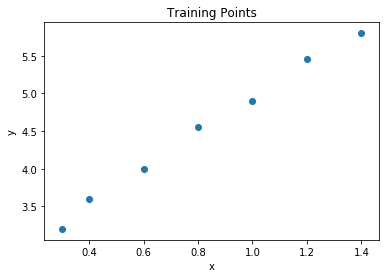

In [11]:
train_X = np.asarray([30.0, 40.0, 60.0, 80.0, 100.0, 120.0, 140.0])
train_Y = np.asarray([320.0, 360.0, 400.0, 455.0, 490.0, 546.0, 580.0])
train_X /= 100.0
train_Y /= 100.0

plot_points(train_X, train_Y, title_name='Training Points')

In [12]:
X = tf.placeholder('float')
y = tf.placeholder('float')
W = tf.Variable(numpy.random.randn(), name='weight')
b = tf.Variable(numpy.random.randn(), name='bias')
n_samples = train_X.shape[0]
y_pred = tf.add(tf.multiply(X, W), b)

In [13]:
cost = tf.reduce_sum(tf.pow((y_pred - y), 2))/(2 * n_samples)


learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Iteration: 0001 | Loss: 4.142424 | W: -0.535123 | b: -1.034000


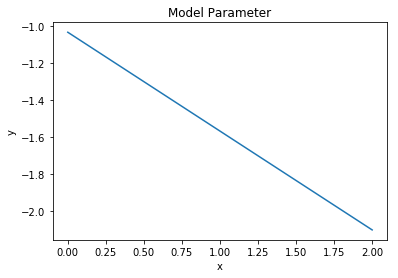

Iteration: 0051 | Loss: 0.694703 | W: 1.229937 | b: 0.972647


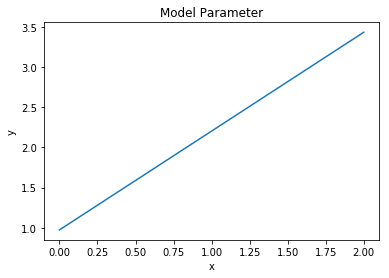

Iteration: 0101 | Loss: 0.106975 | W: 1.970207 | b: 1.823098


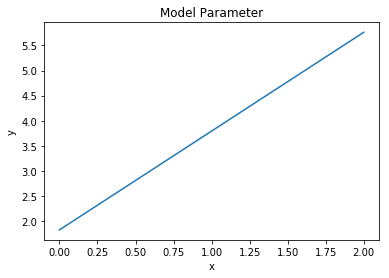

Iteration: 0151 | Loss: 0.012996 | W: 2.278318 | b: 2.185615


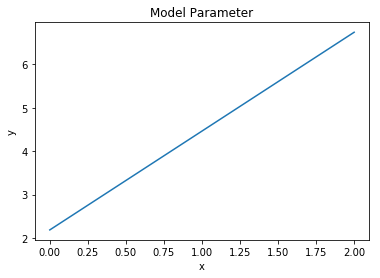

Iteration: 0201 | Loss: 0.000608 | W: 2.404288 | b: 2.342133


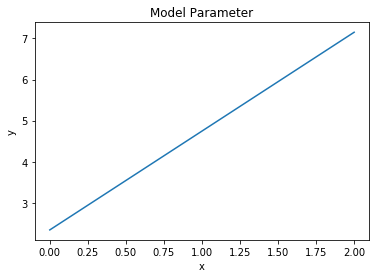

Iteration: 0251 | Loss: 0.000156 | W: 2.453575 | b: 2.411596


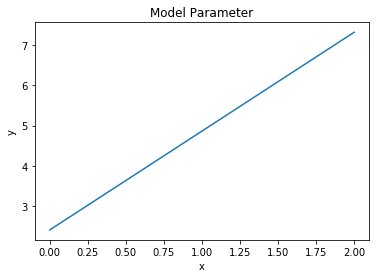

Iteration: 0301 | Loss: 0.000766 | W: 2.470672 | b: 2.444193


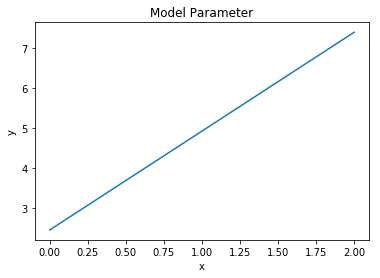

Iteration: 0351 | Loss: 0.001129 | W: 2.474340 | b: 2.461103


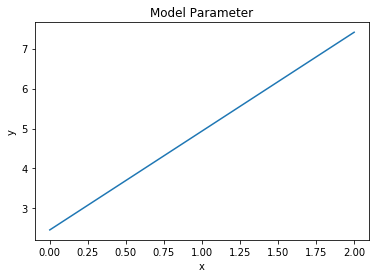

Iteration: 0401 | Loss: 0.001269 | W: 2.472488 | b: 2.471262


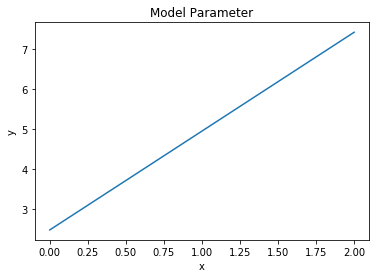

Iteration: 0451 | Loss: 0.001299 | W: 2.468447 | b: 2.478454


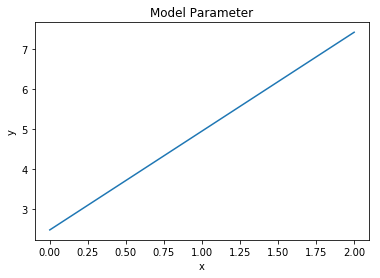

Iteration: 0501 | Loss: 0.001281 | W: 2.463617 | b: 2.484271


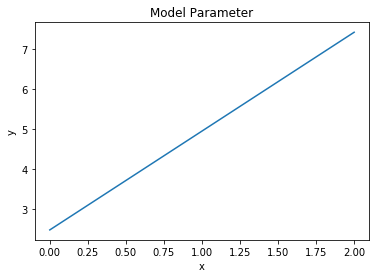

Iteration: 0551 | Loss: 0.001244 | W: 2.458579 | b: 2.489395


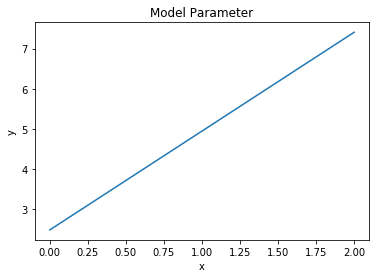

Iteration: 0601 | Loss: 0.001201 | W: 2.453581 | b: 2.494119


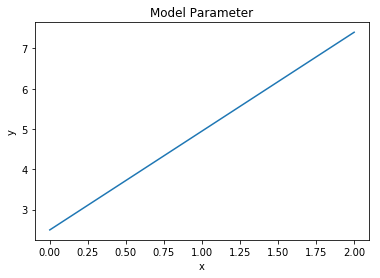

Iteration: 0651 | Loss: 0.001158 | W: 2.448714 | b: 2.498568


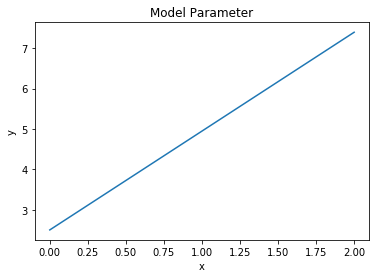

Iteration: 0701 | Loss: 0.001115 | W: 2.444016 | b: 2.502800


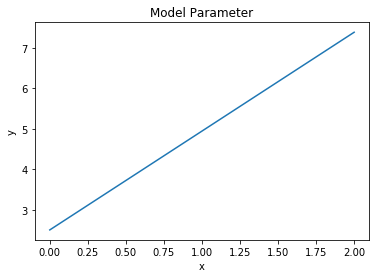

Iteration: 0751 | Loss: 0.001075 | W: 2.439497 | b: 2.506844


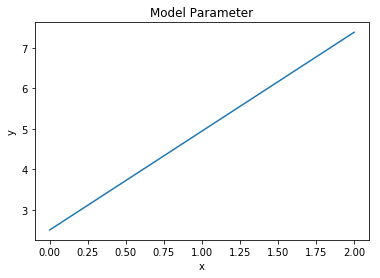

Iteration: 0801 | Loss: 0.001036 | W: 2.435159 | b: 2.510717


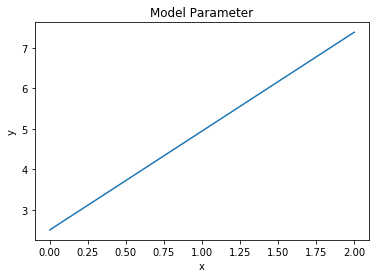

Iteration: 0851 | Loss: 0.001000 | W: 2.430997 | b: 2.514429


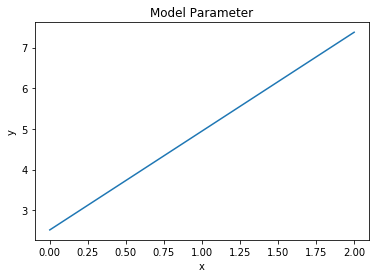

Iteration: 0901 | Loss: 0.000966 | W: 2.427004 | b: 2.517987


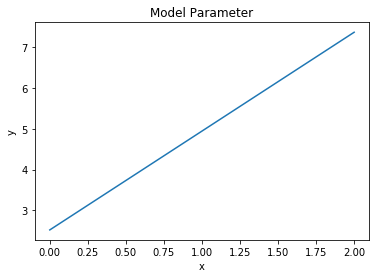

Iteration: 0951 | Loss: 0.000934 | W: 2.423173 | b: 2.521398


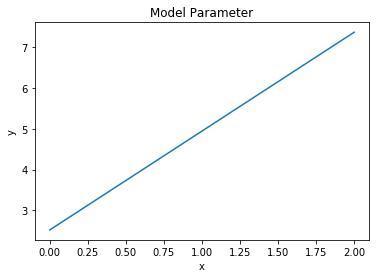

Training loss: 0.000904 | W: 2.419573 | b: 2.524605


In [16]:
training_epochs = 1000
display_step = 50

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    for epoch in range(training_epochs):
        for (x_train, y_train) in zip(train_X, train_Y):
            _, loss, current_W, current_b = sess.run([optimizer, cost, W, b], feed_dict={X: x_train, y: y_train})
        if epoch % display_step == 0:
            print('Iteration: %04d | Loss: %.6f | W: %.6f | b: %.6f'
                  % (epoch + 1, loss, current_W, current_b))
            plot_line(current_W, current_b, 'Model Parameter')
    print('Training loss: %.6f | W: %.6f | b: %.6f' % (loss, sess.run(W), sess.run(b)))
    
